In [19]:
from qiskit.algorithms.gradients import LinCombQGT
from qiskit.algorithms import TrotterQRTE,TimeEvolutionProblem
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit import Parameter
from qiskit.extensions import HamiltonianGate,RXGate
from qiskit.quantum_info import SparsePauliOp
import plotly.express as px
from qiskit.opflow import PauliSumOp
from qiskit.quantum_info import Statevector
import numpy as np
from fidlib.basicfunctions import create_heisenberg,create_ising
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


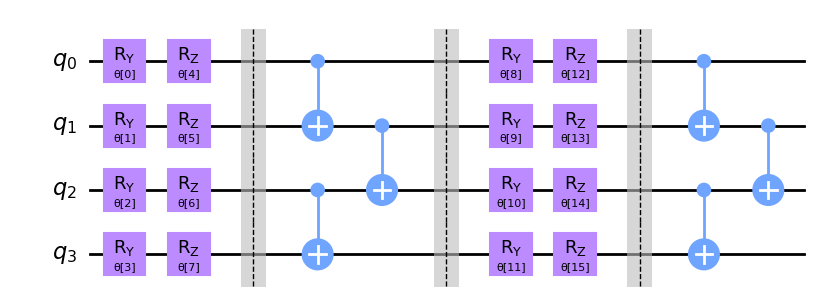

In [35]:
qc=EfficientSU2(num_qubits=4,insert_barriers=True,reps=2,skip_final_rotation_layer=True,entanglement="pairwise")
# qc.barrier()
# qc.append(qc.decompose(),range(4))
display(qc.decompose().draw(output="mpl"))

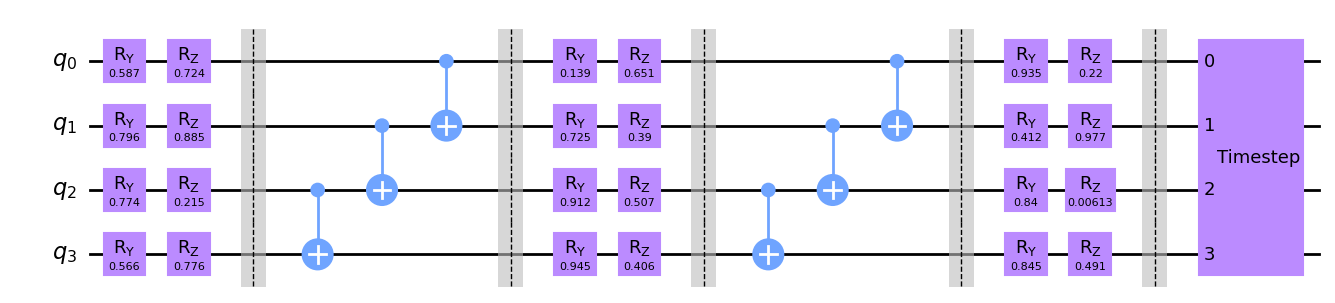

In [17]:
H=create_ising(num_qubits:=4,j_const=2.0,g_const=-1.0,circular=False)
qc=EfficientSU2(num_qubits=num_qubits,insert_barriers=True,reps=2).decompose()
qc.barrier()
qc.append(HamiltonianGate(H,Parameter("T"),"Timestep"),range(num_qubits))
parameters = np.random.rand(qc.num_parameters)
parameters[0]=0
display(qc.assign_parameters(parameters).draw(output="mpl"))

In [18]:
from qiskit.primitives import Estimator
result = LinCombQGT(Estimator()).run([qc],[parameters]).result()

TypeError: Unable to generate Unitary matrix for unbound t parameter T

In [14]:
fisher = result.qgts[0]
px.imshow(fisher.real)